In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv("Churn_Modelling.xls")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.shape

(10000, 14)

In [9]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [22]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [50]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [51]:
model = Sequential()

model.add(Dense(30,activation='relu',input_dim=11))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681 (2.66 KB)

 Trainable params: 681 (2.66 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [66]:
history = model.fit(X_train_scale,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8838 - loss: 0.2958 - val_acc: 0.8612 - val_loss: 0.3305
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8788 - loss: 0.3029 - val_acc: 0.8625 - val_loss: 0.3314
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8823 - loss: 0.2990 - val_acc: 0.8600 - val_loss: 0.3314
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8774 - loss: 0.2988 - val_acc: 0.8587 - val_loss: 0.3334
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8787 - loss: 0.2965 - val_acc: 0.8562 - val_loss: 0.3332
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8886 - loss: 0.2855 - val_acc: 0.8606 - val_loss: 0.3319
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8727 - loss: 0.3068 - val_acc: 0.8612 - val_loss: 0.3349
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8768 - loss: 0.2944 - val_acc: 0.8619 - val_loss: 0.3359
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

In [67]:
pd.DataFrame(history.history)

,acc,loss,val_acc,val_loss
0,0.881875,0.298425,0.861250,0.330506
1,0.879687,0.297443,0.862500,0.331390
2,0.879531,0.297955,0.860000,0.331397
3,0.879531,0.297671,0.858750,0.333375
4,0.880000,0.296429,0.856250,0.333192
5,0.881406,0.296138,0.860625,0.331938
6,0.879844,0.297914,0.861250,0.334948
7,0.877969,0.297295,0.861875,0.335923
8,0.879062,0.296418,0.855625,0.334247
9,0.880938,0.295055,0.848750,0.337975


<Axes: >

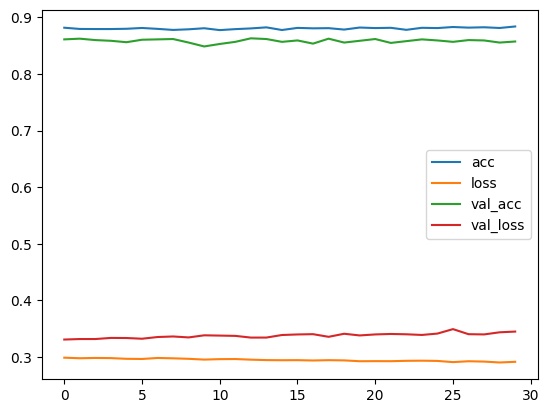

In [68]:
pd.DataFrame(history.history).plot()

In [62]:
model.layers[0].get_weights()

[array([[-1.40255675e-01, -1.32136717e-01,  1.08059227e-01,
         -5.76418221e-01, -1.26545608e-01,  1.18014753e-01,
          1.20671257e-01, -2.36874044e-01, -6.78574592e-02,
         -2.34694153e-01, -1.97120532e-01,  3.96106243e-01,
          6.48341656e-01,  1.71048611e-01,  7.59302499e-03,
          2.12461352e-01, -2.48308718e-01,  6.71921894e-02,
          3.16448361e-01, -8.14046115e-02, -3.28661978e-01,
         -5.28557479e-01, -3.10889781e-02, -2.21960545e-01,
          3.60172927e-01, -4.19327319e-01,  1.92451566e-01,
          6.11927986e-01,  9.73151699e-02,  1.28838047e-01],
        [ 5.00875771e-01,  4.98149335e-01, -1.90368816e-01,
          2.50929773e-01,  3.70859832e-01, -5.72521165e-02,
         -4.84980375e-01, -3.67654145e-01,  4.72390413e-01,
          3.47708106e-01, -5.95220923e-01,  9.40234065e-02,
          1.54967517e-01,  7.10971177e-01,  6.41084850e-01,
         -5.53238988e-01, -1.50059521e-01,  2.14709595e-01,
         -2.19553649e-01, -7.95675695e-

In [63]:
y_log = model.predict(X_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [64]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8555